In [20]:
import pandas as pd
from pandas import DataFrame
from pylab import *
import matplotlib.pyplot as plot

In [21]:
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")

In [22]:
# read abalone data
abalone = pd.read_csv(target_url, header=None, prefix="V")
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Vscera weight', 'Shell weight', 'Rings']

print(abalone.head())
print(abalone.tail())

# print summary of data frame
summary = abalone.describe()
print(summary)

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Vscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245         0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995         0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565         0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155         0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895         0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   

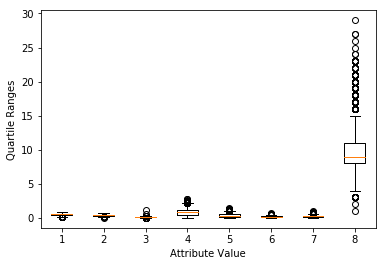

In [23]:
# box plot the real-valued attributes
# convert to array for plot routine

array = abalone.iloc[:,1:9].values
plot.boxplot(array)

plot.xlabel("Attribute Value")
plot.ylabel(("Quartile Ranges"))
plot.show()

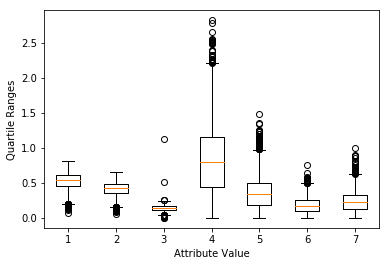

In [24]:
# the last column (rings) is out of scale with the rest - remove and replot
array2 = abalone.iloc[:,1:8].values
plot.boxplot(array2)

plot.xlabel("Attribute Value")
plot.ylabel(("Quartile Ranges"))
plot.show()

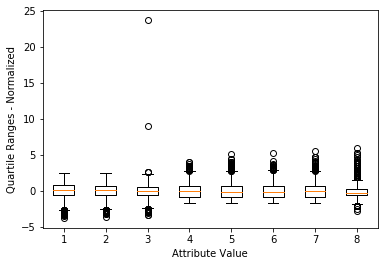

In [25]:
# removing is okay but renormalizing the variables generalizes better
# renormalize columns to zero mean and unit standard deviation
# this is a common normalization and desirable for other operations like k-means clustering or k-nearest neighbors

abaloneNormalized = abalone.iloc[:,1:9]

for i in range(8):
    mean = summary.iloc[1,i]
    sd = summary.iloc[2,i]
    
    abaloneNormalized.iloc[:,i:(i+1)] = (abaloneNormalized.iloc[:,i:(i+1)] - mean)/sd
    
array3 = abaloneNormalized.values
plot.boxplot(array3)

plot.xlabel("Attribute Value")
plot.ylabel(("Quartile Ranges - Normalized"))
plot.show()

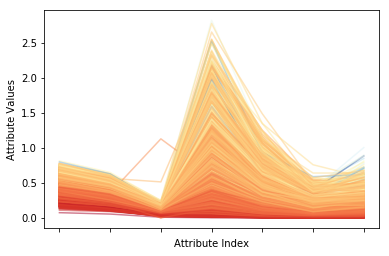

In [26]:
# parallel coordinates for regression problems - visualize variable relationships for abalone problem

minRings = summary.iloc[3,7]
maxRings = summary.iloc[7,7]
nrows = len(abalone.index)

for i in range(nrows):
    # plot rows of data as if they were series data
    dataRow = abalone.iloc[i,1:8]
    labelColor = (abalone.iloc[i,8] - minRings) / (maxRings - minRings)
    dataRow.plot(color=plot.cm.RdYlBu(labelColor), alpha=0.5)
    
plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()

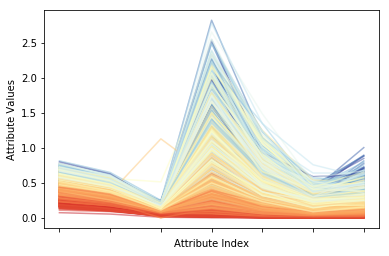

In [27]:
# renormalize using mean and standard deviation, then compress with logit function
from math import exp

meanRings = summary.iloc[1,7]
sdRings = summary.iloc[2,7]

for i in range(nrows):
    # plot rows of data as if they were series data
    dataRow = abalone.iloc[i,1:8]
    normTarget = (abalone.iloc[i,8] - meanRings) / sdRings
    labelColor = 1.0/(1.0 + exp(-normTarget))
    dataRow.plot(color=plot.cm.RdYlBu(labelColor), alpha=0.5)
    
plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()

                  Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Vscera weight   0.903018  0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                Vscera weight  Shell weight     Rings  
Length               0.903018      0.897706  0.556720  
Diameter             0.899724      0.905330  0.574660  
Height               0.798319      0.817338  0.557467  
Whole weight         0.966375      0.955355  0.540390  
Shucked weight   

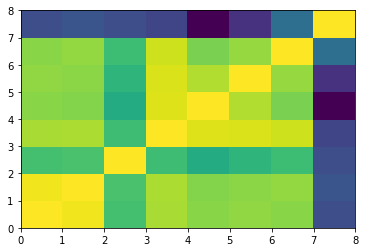

In [29]:
#  use correlation heat map for regression - visualize pair-wise correlations for abalone data

# calculate correlations between real-value attribtues
corMat = DataFrame(abalone.iloc[:,1:9].corr())

# print correlation matrix
print(corMat)

# visualize correlations using heatmap
plot.pcolor(corMat)
plot.show()